In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline


In [26]:
plt.rcParams['figure.figsize'] = [18, 16]

In [2]:
df = pd.read_csv("sf_crime.csv")

In [3]:
df.shape

(878049, 9)

# Data Exploration

Let us try to answer the following questions

* What are most common type of crimes that happen in SF?
* Do these crimes get resolved?
* Is there a trend in time when a particular type of crime is common?

Before proceeding, let's check the sanity of the data i.e % of null values in the columns and number of duplicates

In [4]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [5]:
100 * df.isnull().sum() / df.shape[0]

Dates         0.0
Category      0.0
Descript      0.0
DayOfWeek     0.0
PdDistrict    0.0
Resolution    0.0
Address       0.0
X             0.0
Y             0.0
dtype: float64

It's good to see that we don't have any missing values in dataset. Let's check for duplicates in the dataset.

In [6]:
df[df.duplicated()]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
582,2015-05-12 11:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421
1133,2015-05-03 23:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Sunday,CENTRAL,NONE,STOCKTON ST / NORTHPOINT ST,-122.410501,37.806963
1822,2015-05-02 02:30:00,ASSAULT,BATTERY,Saturday,PARK,NONE,1300 Block of MCALLISTER ST,-122.434257,37.778370
2109,2015-05-01 11:30:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Friday,SOUTHERN,"ARREST, BOOKED",10TH ST / HARRISON ST,-122.411279,37.771579
3004,2015-04-29 10:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.466205,37.772541
3335,2015-04-28 12:40:00,OTHER OFFENSES,INCIDENT ON SCHOOL GROUNDS,Tuesday,TARAVAL,NONE,2200 Block of 14TH AV,-122.470360,37.746075
3734,2015-04-27 12:00:00,MISSING PERSON,MISSING ADULT,Monday,NORTHERN,NONE,1100 Block of FILLMORE ST,-122.432116,37.780030
4516,2015-04-18 16:00:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Saturday,CENTRAL,NONE,VALLEJO ST / DAVIS ST,-122.398886,37.799830
4773,2015-04-17 21:55:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Friday,SOUTHERN,NONE,3RD ST / CHANNEL ST,-122.389898,37.774898
5655,2015-04-15 20:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,LEAVENWORTH ST / JEFFERSON ST,-122.419088,37.807802


Let's drop the duplicates and then continue with our data exploration

In [7]:
df.drop_duplicates(inplace=True)

Let's check the categories of crimes reported in our dataset and what is the major type

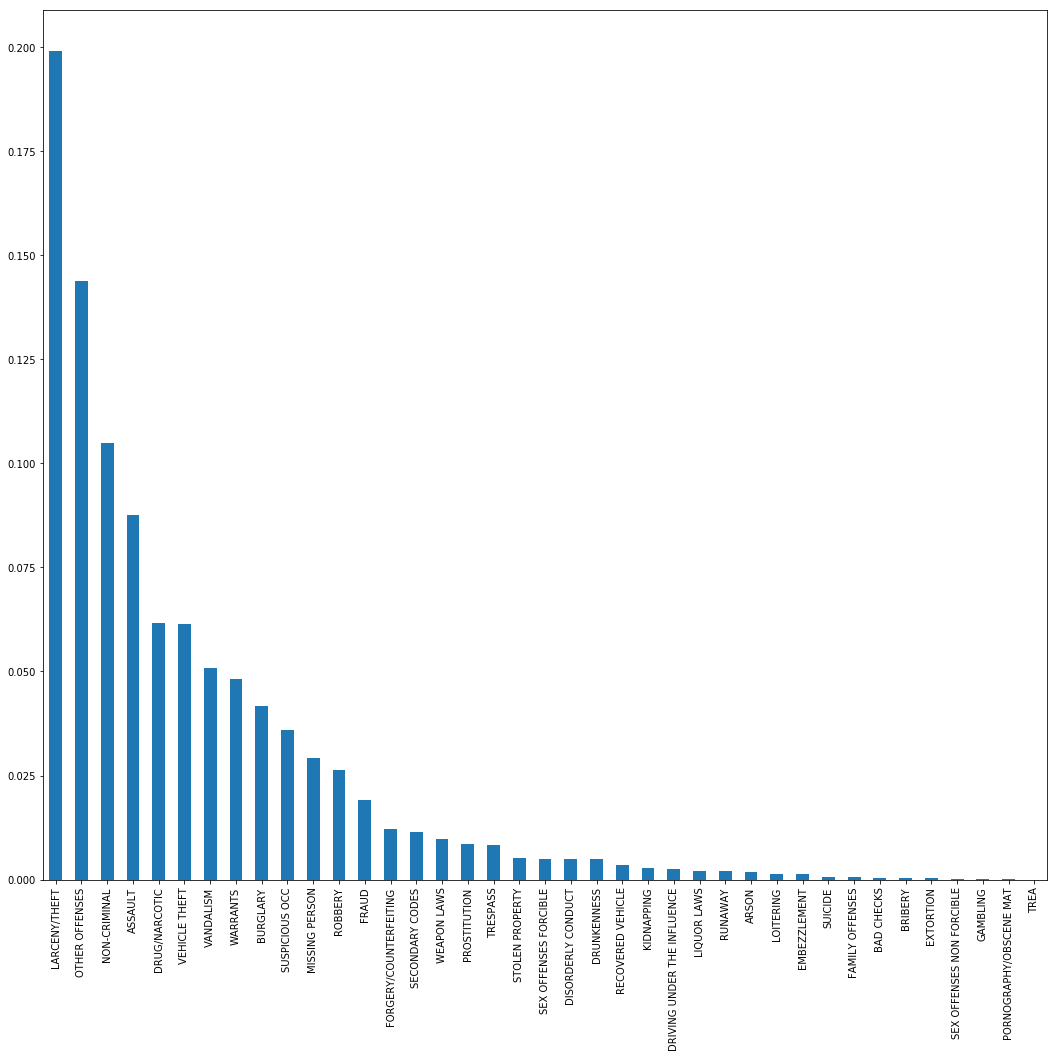

In [32]:
(df.Category.value_counts().sort_values(ascending=False)/df.shape[0]).plot(kind='bar')

It's the `Theft` that happens in common in the city of SF. Quite surprising given the fact that its a major city with all the tech advances. Let's check what % of crimes are resolved and what type of crimes are resolved the most.

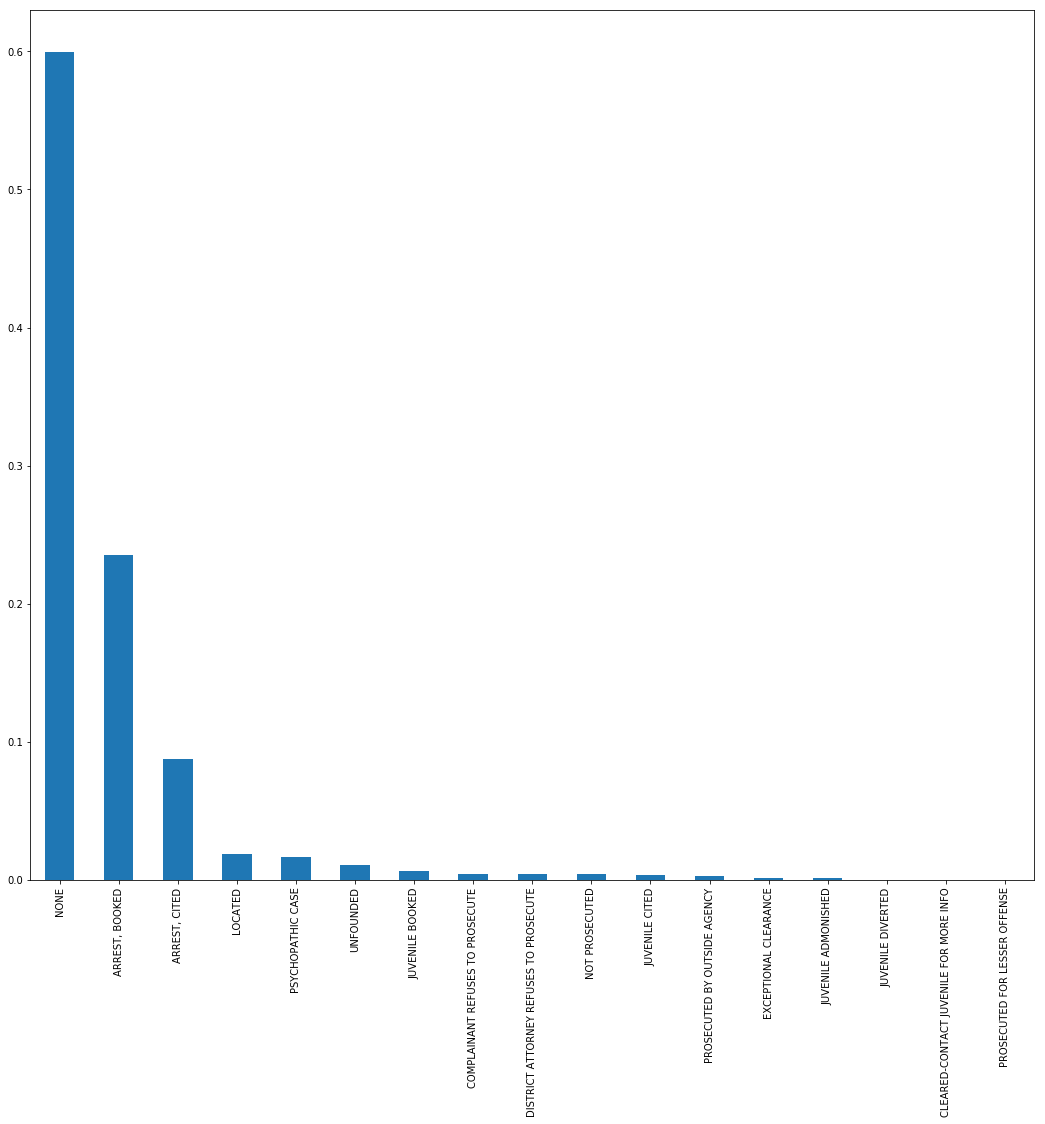

In [31]:
(df.Resolution.value_counts().sort_values(ascending=False)/df.shape[0]).plot(kind='bar')

In [10]:
df.Resolution.unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

In [11]:
df.groupby(['Category','Resolution']).size().reset_index(name='count').sort_values(by='count',ascending=False)

,Category,Resolution,count
225,LARCENY/THEFT,NONE,156062
280,NON-CRIMINAL,NONE,68163
489,VEHICLE THEFT,NONE,49171
287,OTHER OFFENSES,"ARREST, CITED",47194
24,ASSAULT,NONE,44688
89,DRUG/NARCOTIC,"ARREST, BOOKED",43708
286,OTHER OFFENSES,"ARREST, BOOKED",41179
474,VANDALISM,NONE,39090
494,WARRANTS,"ARREST, BOOKED",38724
297,OTHER OFFENSES,NONE,33128


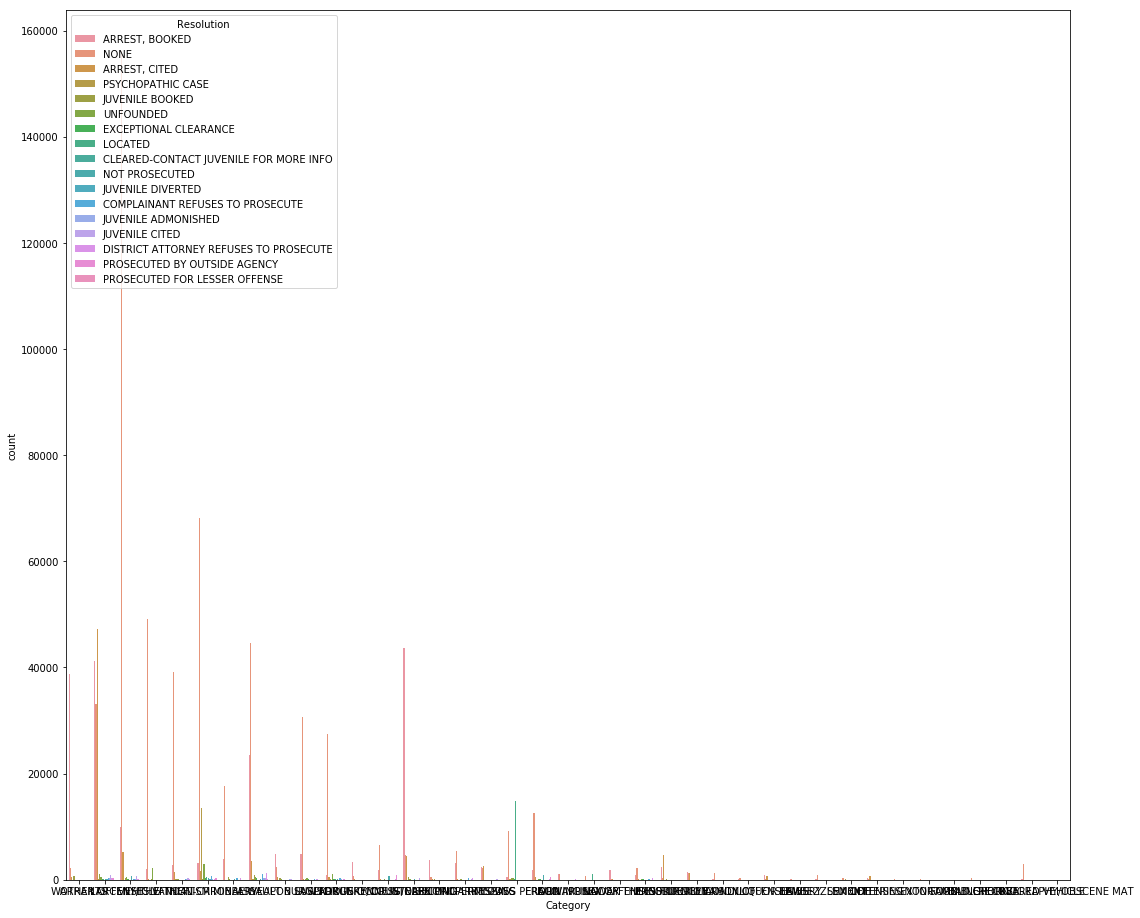

In [27]:
sns.countplot(x='Category', hue='Resolution', data=df)

We can't make sense of the data that's being plotted above. Let's make a small change to our dataset and derive a new feature called `is_resolved` where the value is 1 if the case was resolved and 0 if not. For simplicity lets take the values `'ARREST, BOOKED', 'ARREST, CITED', 'PSYCHOPATHIC CASE','JUVENILE BOOKED', 'LOCATED','CLEARED-CONTACT JUVENILE FOR MORE INFO', 'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE', 'JUVENILE ADMONISHED', 'JUVENILE CITED', 'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'`  as reolved and `'NONE','UNFOUNDED','EXCEPTIONAL CLEARANCE','NOT PROSECUTED','DISTRICT ATTORNEY REFUSES TO PROSECUTE'` as not resolved.

In [13]:
resolved = ['ARREST, BOOKED', 'ARREST, CITED', 'PSYCHOPATHIC CASE','JUVENILE BOOKED', \
			'LOCATED','CLEARED-CONTACT JUVENILE FOR MORE INFO', 'JUVENILE DIVERTED', \
			'COMPLAINANT REFUSES TO PROSECUTE', 'JUVENILE ADMONISHED', 'JUVENILE CITED', \
			'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE']
def is_resolved(resolution):
	if resolution in resolved:
		return 1
	return 0

In [14]:
df['is_resolved']=df.Resolution.apply(is_resolved)

In [15]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,is_resolved
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,0


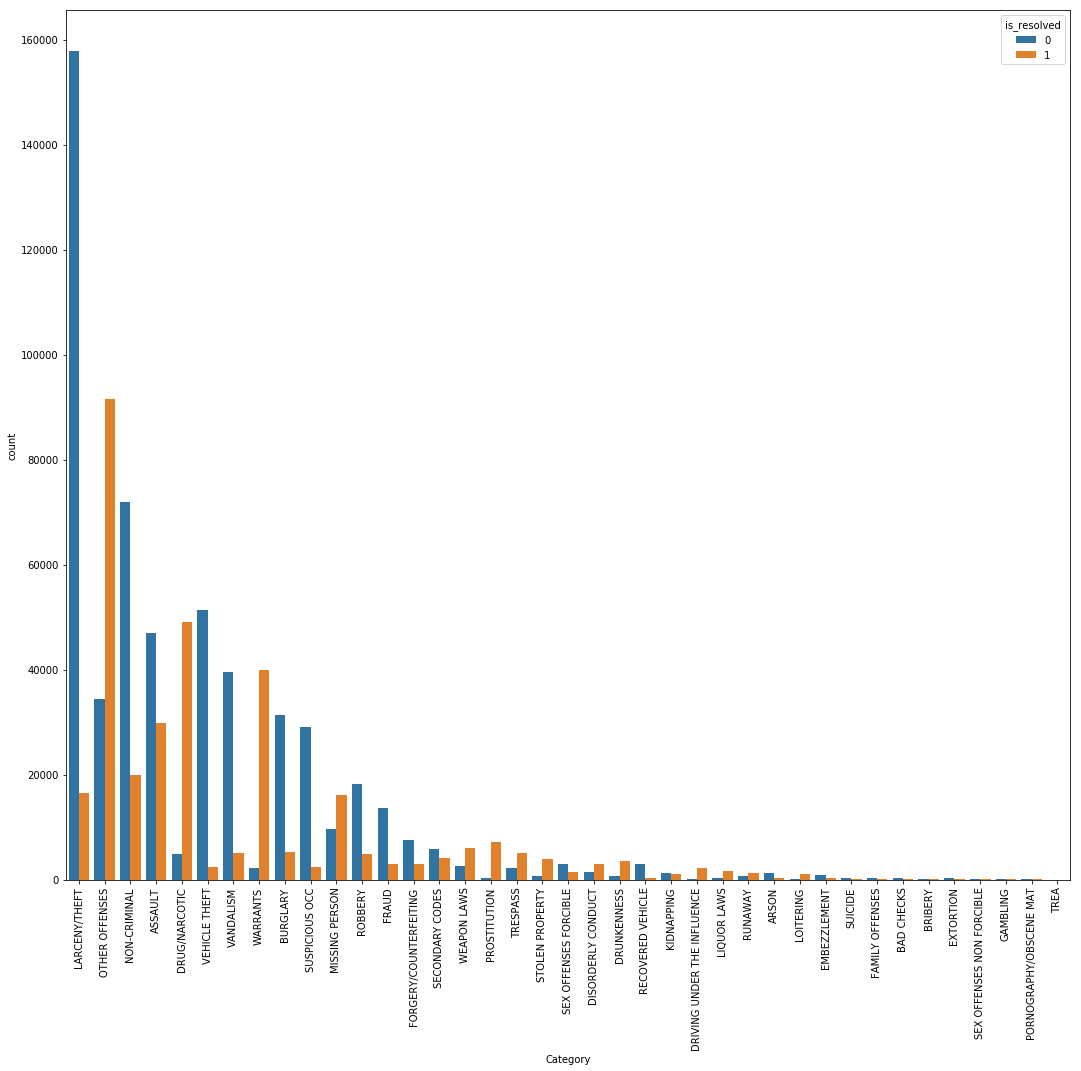

In [28]:
sns.countplot(x='Category', hue='is_resolved', data=df,order = df.Category.value_counts().index)
plt.xticks(rotation=90)
plt.show()

It looks like out of all the cases reported more than 60% of the cases don't get resolved and from the categories of crimes reported Theft has a very low probability of getting resolved. Also, what's interesting to see from the plot is that major % of cases reported under `DRUG/NARCOTIC` get resolved. Ofcourse, no country wants drug infestation, so they have high priority.

Now let's take a look at number of crimes reported based on timestamps and day of the week and answer the following questions.

* What types of crimes are common for a particular day?
* Any seasonality trend in the crimes?

In [17]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,is_resolved
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,0


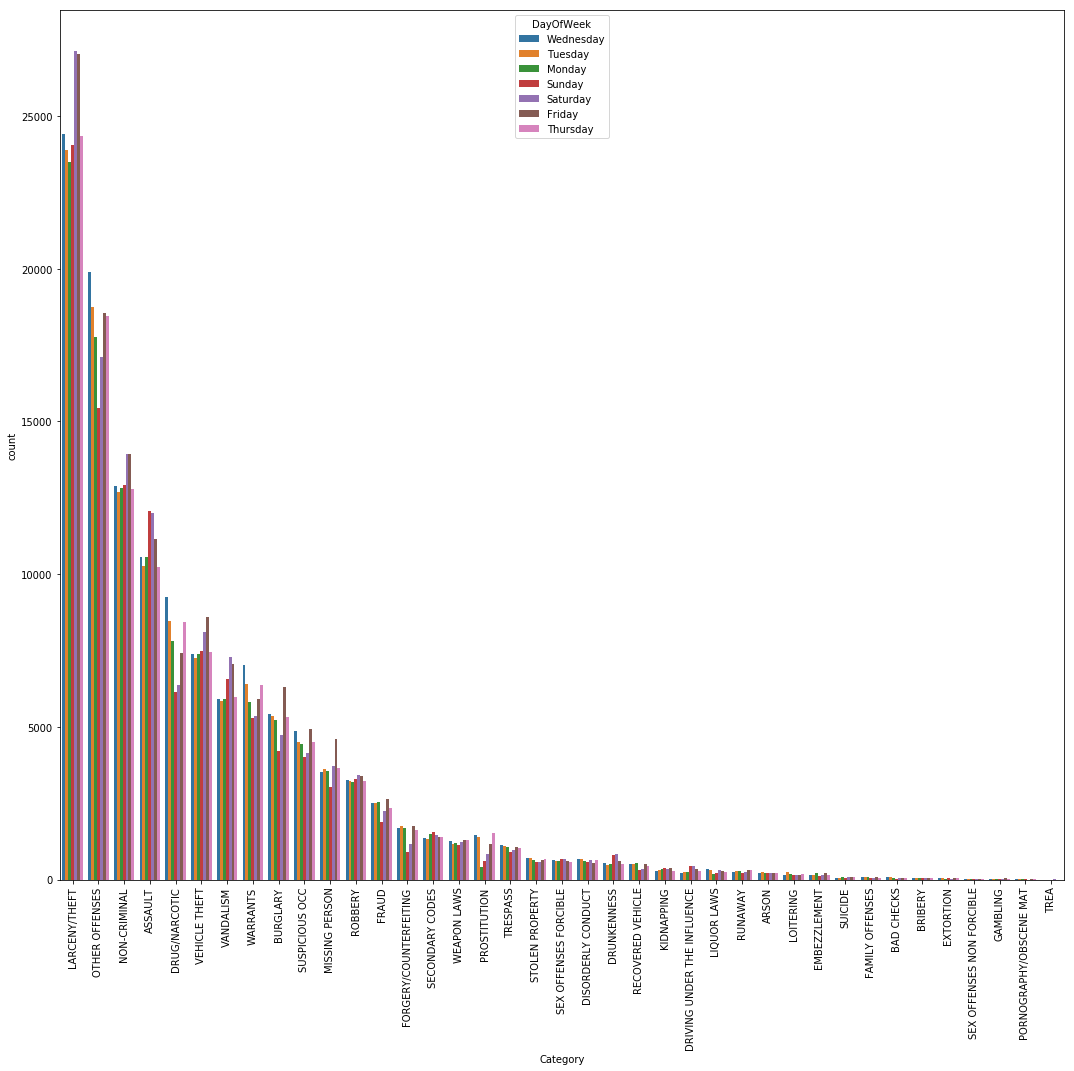

In [29]:
sns.countplot(x='Category', hue='DayOfWeek', data=df,order = df.Category.value_counts().index)
plt.xticks(rotation=90)
plt.show()

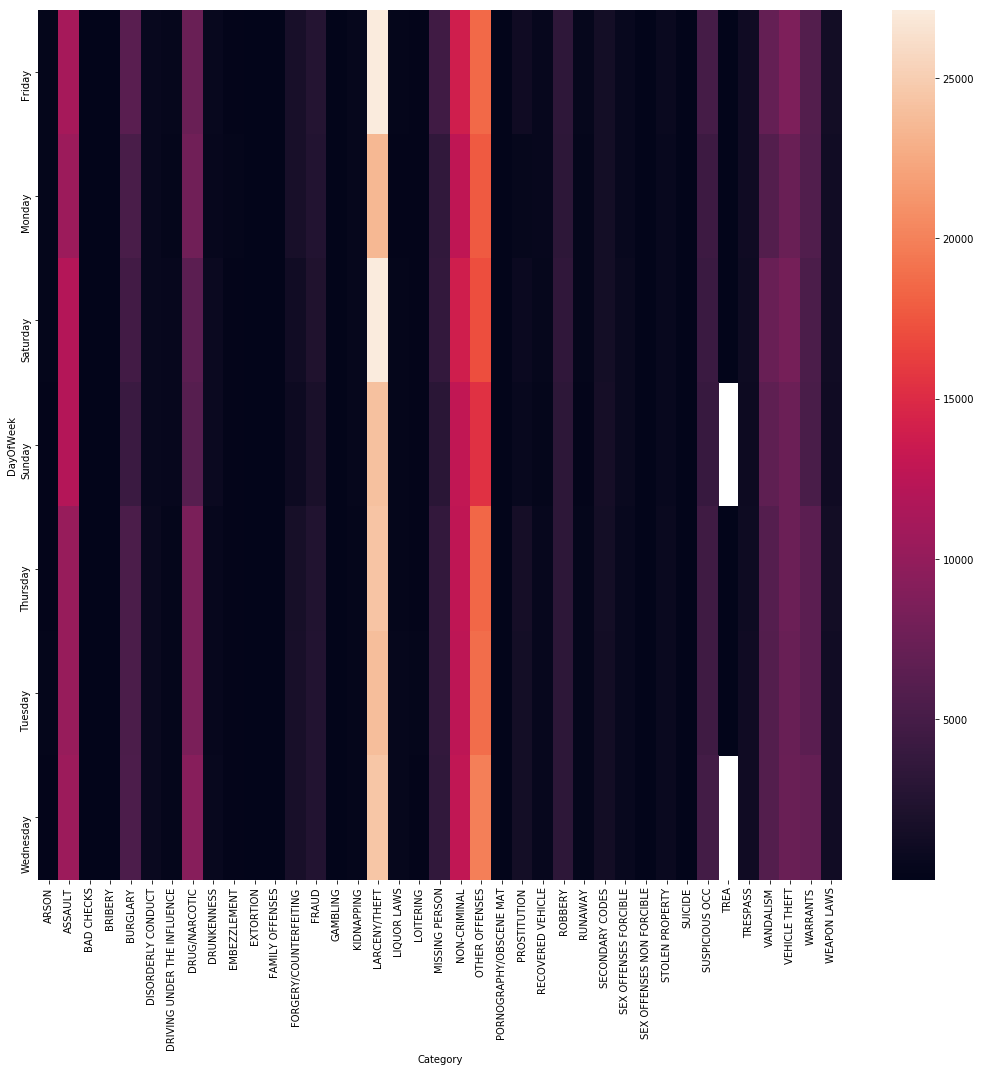

In [30]:
sns.heatmap(df.groupby(['Category','DayOfWeek']).size().reset_index(name='count').sort_values(by='count',ascending=False).pivot("DayOfWeek", "Category", "count"))

From the heat plot above we can see that most of the crimes reported are consistent throughout the week except for `TREA` category, which is high on Wednesday and Sunday. Also, for the category `LARCENY/THEFT` it spikes on Friday and Saturday i.e in the beginning of the weekends. Is it because people party these days or are out on the streets more or are intoxicated and thus higher number of crimes?? Let's see what time these crimes are reported.

Let's create a new feature based on the timestamp to see when the crime was reported i.e Morning, Afternoon, Evening, Night etc. and call this feature as `part_of_day`

In [43]:
from datetime import datetime
def get_part_of_day(time_now):
    """Return part of day depending on time_now and the user's timzone
    offset value.
    From  -  To  => part of day
    ---------------------------
    00:00 - 04:59 => midnight
    05:00 - 06:59 => dawn
    07:00 - 10:59 => morning
    11:00 - 12:59 => noon
    13:00 - 16:59 => afternoon
    17:00 - 18:59 => dusk
    19:00 - 20:59 => evening
    21:00 - 23:59 => night
    """
    format = '%Y-%m-%d %H:%M:%S'
    x= datetime.strptime(time_now, format)
    user_hour = x.hour
    month = x.month
    day = x.day
    if user_hour < 5:
        part_day = 'midnight'
    elif user_hour < 7:
        part_day =  'dawn'
    elif user_hour < 11:
        part_day = 'morning'
    elif user_hour < 13:
        part_day = 'noon'
    elif user_hour < 17:
        part_day = 'afternoon'
    elif user_hour < 19:
        part_day = 'dusk'
    elif user_hour < 21:
        part_day = 'evening'
    else:
        part_day = 'night'
    return part_day

In [44]:
df['part_of_day']=df.Dates.apply(get_part_of_day)

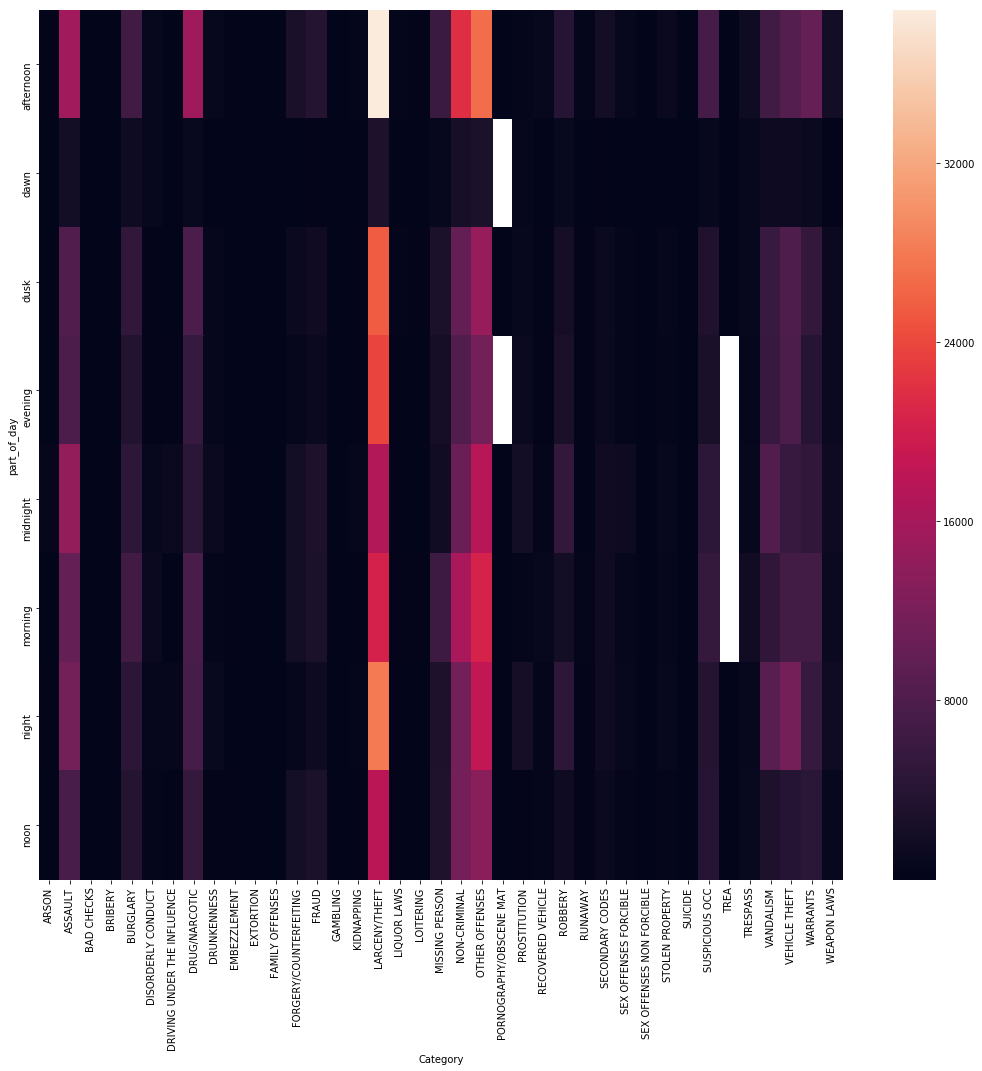

In [46]:
sns.heatmap(df.groupby(['Category','part_of_day']).size().reset_index(name='count').sort_values(by='count',ascending=False).pivot("part_of_day", "Category", "count"))

High number of `LARCENY/THEFT` happen mostly during the afternoons and have higher rates at dusk, evening and at night times!! May be partying/intoxication of victims helps thieves to be successful?? Wish we had more data to figure this out!

In [36]:
import folium
from folium.plugins import HeatMap

In [23]:
m = folium.Map([37.7749, -122.4194], zoom_start=11)
# plot heatmap
crime_coordinates = df[['Y', 'X']].values
m.add_child(plugins.HeatMap(crime_coordinates, radius=15))

In [39]:
def embed_map(m):
    from IPython.display import IFrame

    m.save('index.html')
    return IFrame('index.html', width='100%', height='750px')

In [68]:
embed_map(m)

Well well! Almost every part of SF has a crime reported!!!!

One last thing to check, let's see which PD has highest number of cases resolved

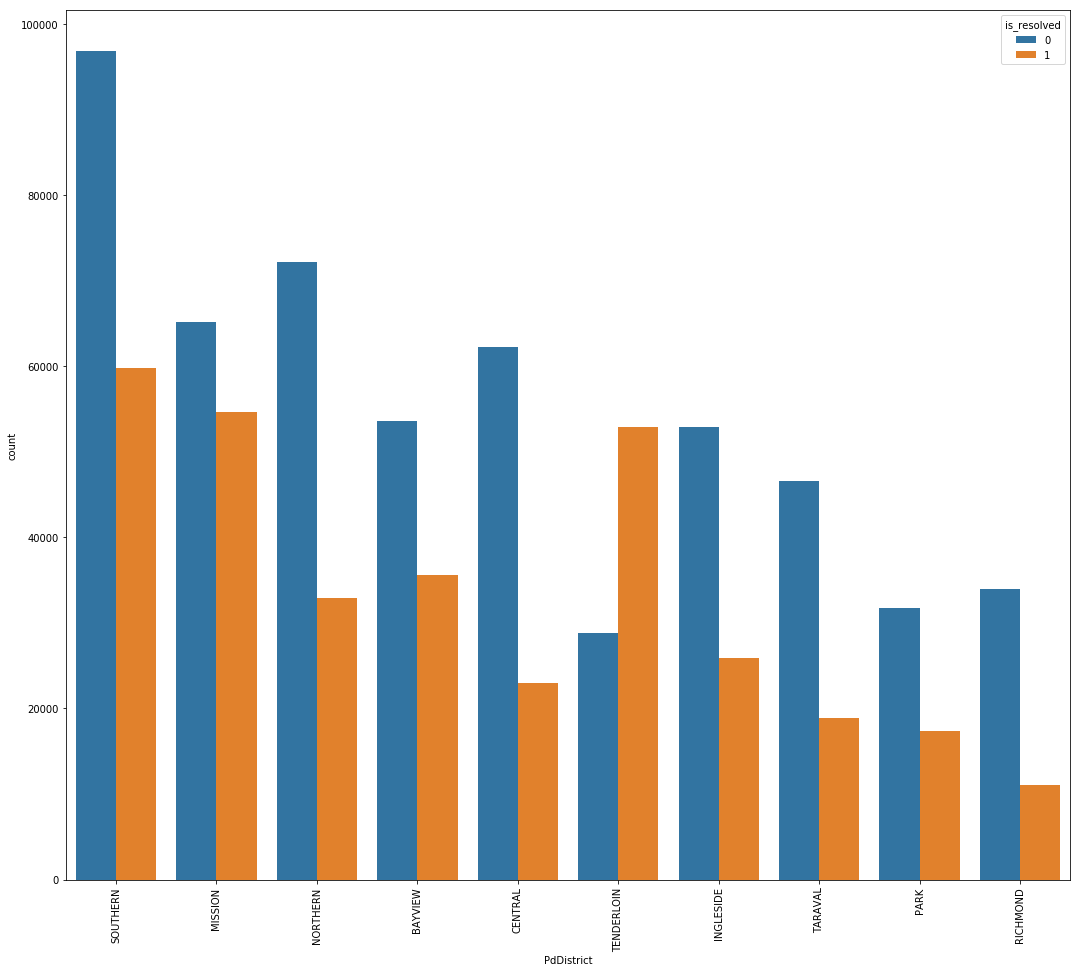

In [42]:
sns.countplot(x='PdDistrict', hue='is_resolved', data=df,order = df.PdDistrict.value_counts().index)
plt.xticks(rotation=90)
plt.show()

# Conclusions
So to summarize we went through the SF Crime dataset obtained from Kaggle (https://www.kaggle.com/c/sf-crime/data) and did some data exploration to see what the data tells us. Here is what we found

* `LARCENY/THEFT` and `OTHER OFFENSES` happen to be the top 2 crimes reported in SF
* Major number of crimes are reported at the Southern District and Southern District happen to have resolved a vast % of cases they received.
* Out of all the cases reported more than 60% of the cases don't get resolved and from the categories of crimes reported `LARCENY/THEFT` has a very low probability of getting resolved. Also, what was interesting to see from the plot is that major % of cases reported under `DRUG/NARCOTIC` get resolved. Ofcourse, no country wants drug infestation, so they have high priority.
* Crimes are consistent throught the week. What was interesting to see was that `LARCENY/THEFT` has higher chances during Fridays and Saturdays. 
* High number of `LARCENY/THEFT` happen mostly during the afternoons and have higher rates at dusk, evening and at night times!!

# Modeling

Now let's try to build a simple model based on the data we have to see if a given crime will be resolved or not. Let's use following features that we already have

* Category
* PdDistrict
* is_resolved (Predicting column)
* DayOfWeek
* part_of_day

In [45]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,is_resolved,part_of_day
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,night
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,1,night
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,1,night
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,0,night
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,0,night


Let's get rid of the additional features that we have and those that are not being used in the modelling process

In [52]:
df_modelling=df.drop(['Descript','Address','X','Y','Dates','Resolution'],axis=1)

In [53]:
df_modelling.head()

,Category,DayOfWeek,PdDistrict,is_resolved,part_of_day
0,WARRANTS,Wednesday,NORTHERN,1,night
1,OTHER OFFENSES,Wednesday,NORTHERN,1,night
2,OTHER OFFENSES,Wednesday,NORTHERN,1,night
3,LARCENY/THEFT,Wednesday,NORTHERN,0,night
4,LARCENY/THEFT,Wednesday,PARK,0,night


Most of the values we have are categorical. So let's one hot encode these before we start the training process

In [51]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [55]:
df_modelling = create_dummy_df(df_modelling,['Category','DayOfWeek','PdDistrict','part_of_day'],False)

In [56]:
df_modelling.shape

(875726, 61)

Let's now seperate the coulmns into X and Y and split the dataset for training and testing

In [58]:
df_X = df_modelling.drop('is_resolved',axis=1).values
df_Y = df_modelling.is_resolved.values

X_train, X_test, Y_train, Y_test = train_test_split(df_X,df_Y,train_size=.80,random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
Y_predict = model.predict(X_test)

In [62]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(Y_test,Y_predict,digits=6))

             precision    recall  f1-score   support

          0   0.834673  0.879699  0.856595    109093
          1   0.781877  0.712216  0.745423     66053

avg / total   0.814762  0.816536  0.814668    175146



That's a good F1 score to start with the features that we have!!